# Test reading of GHOST data

In [1]:
import pyaerocom as pya

In [2]:
pya.const.has_access_lustre

True

### Load GHOST PM10 data 

- All sites
- All times, i.e. 2018 & 2019

In [10]:
reader = pya.io.ReadUngridded()

In [11]:
obs_pm10 = reader.read('GHOST.daily', 'concpm10')
obs_pm10

UngriddedData <networks: [None]; vars: ['concpm10']; instruments: [];No. of metadata units: 38164

In [12]:
obs_pm10_qa =  obs_pm10.set_flags_nan()

**NOTE**: this dataset contains a lot of metadata blocks. This is partly due to the fact, that the data files are only containing one month of data (since metadata is allowed to change on a monthly basis in GHOST). The number of unique sites can be retrieved via:

In [13]:
len(obs_pm10.unique_station_names)

2872

Still, a lot of sites. 

### Plot site locations

(30, 80)

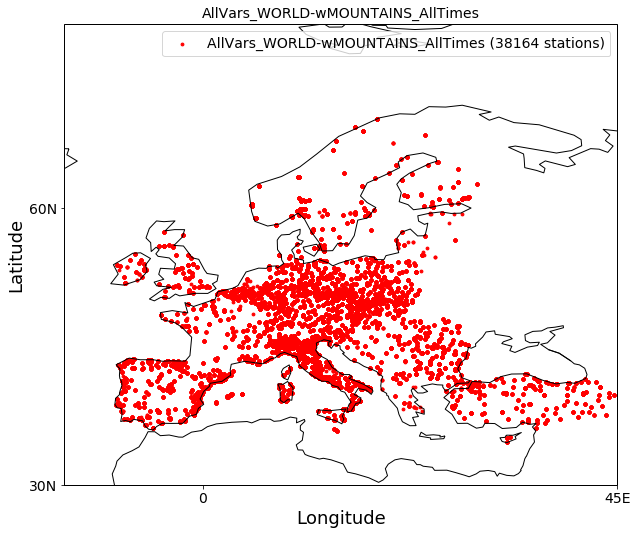

In [6]:
ax = obs_pm10.plot_station_coordinates()
ax.set_xlim([-15, 45])
ax.set_ylim([30, 80])

### Check metadata (use first metadata block as example)

In [7]:
obs_pm10.metadata[0]

StationMetaData([('filename', None),
                 ('station_id', None),
                 ('station_name', 'Vidin 2'),
                 ('instrument_name', None),
                 ('PI', None),
                 ('country', 'Bulgaria'),
                 ('ts_type', 'daily'),
                 ('latitude', 43.998931999999996),
                 ('longitude', 22.867589),
                 ('altitude', 35.0),
                 ('data_id', None),
                 ('dataset_name', None),
                 ('data_product', None),
                 ('data_version', None),
                 ('data_level', 'E1a'),
                 ('revision_date', None),
                 ('website', None),
                 ('ts_type_src', None),
                 ('stat_merge_pref_attr', None),
                 ('var_info',
                  {'concpm10': {'standard_name': 'PM10 mass',
                    'long_name': 'PM10 mass',
                    'units': 'ug m-3',
                    'description': 'Measured val

In [8]:
obs_pm10.metadata[0]['var_info']

{'concpm10': {'standard_name': 'PM10 mass',
  'long_name': 'PM10 mass',
  'units': 'ug m-3',
  'description': 'Measured value of surface PM10 mass for the stated temporal resolution.'}}

### Display first 100 site location names

In [9]:
print(obs_pm10.unique_station_names[:100])

['40Al01 - Linkeroever', '40Al02 - Beveren', '40Al03 - Beveren', '40Al05 - Beveren', '40Gk06 - Genk', '40Hb23 - Hoboken', '40Mn01 - Menen', '40Ob01 - Oostrozebek', '40Ob02 - Wielsbeke', '40Rb01 - Ruisbroek', '40Rl01 - Roeselare', '40Sa04 - Hoevenen', '40Sz02 - Steenokkerz', '41B011 - Berchem S.A', '41Meu1 - Meudon', '41N043 - Haren', '41R001 - Molenbeek', '41R012 - Uccle', '41Wol1 - Wol.St.L.', '42M802 - Antwerpen', '42N016 - Dessel', '42N035 - Aarschot', '42N054 - Walshoutem', '42R020 - Vilvoorde', '42R801 - Borgerhout', '42R802 - Borgerhout', '42R803 - Antwerpen', '42R805 - Antwerpen', '42R811 - Schoten', '42R817 - Antwerpen', '42R823 - Beveren', '42R831 - Berendrecht', '42R834 - Boom', '43H201 - Liege', '43M204 - Angleur', '43N060 - Havinnes', '43N063 - Corroy L.G.', '43N067 - Membach', '43N070 - Mons', '43N073 - Vezin', '43N085 - Vielsalm', '43N093 - Sinsin', '43N100 - Dourbes', '43N113 - Saint-Ode', '43N121 - Offagne', '43N132 - Habay-La-N.', '43R221 - Liege', '43R222 - Seraing', 

### Check paris

In [17]:
[obs_pm10.metadata[k]['station_name'] for k in obs_pm10.find_station_meta_indices('Paris*')]

['Paris 18Eme',
 'Paris Centre',
 'Paris 18Eme',
 'Paris Centre',
 'Paris 18Eme',
 'Paris Centre',
 'Paris 18Eme',
 'Paris Centre',
 'Paris 18Eme',
 'Paris Centre',
 'Paris 18Eme',
 'Paris Centre',
 'Paris 18Eme',
 'Paris Centre',
 'Paris 18Eme',
 'Paris Centre',
 'Paris 18Eme',
 'Paris Centre',
 'Paris 18Eme',
 'Paris Centre',
 'Paris 18Eme',
 'Paris Centre',
 'Paris 18Eme',
 'Paris Centre']

In [18]:
obs_pm10.to_station_data('Paris Centre')

StationData([('dtime',
              array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
                     '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
                     '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
                     '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
                     '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000',
                     '2018-01-11T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
                     '2018-01-13T00:00:00.000000000', '2018-01-14T00:00:00.000000000',
                     '2018-01-15T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
                     '2018-01-17T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
                     '2018-01-19T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
                     '2018-01-21T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
                    

In [10]:
example_site = obs_pm10.to_station_data('40Al01 - Linkeroever')

/home/jonasg/miniconda3/envs/pya/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


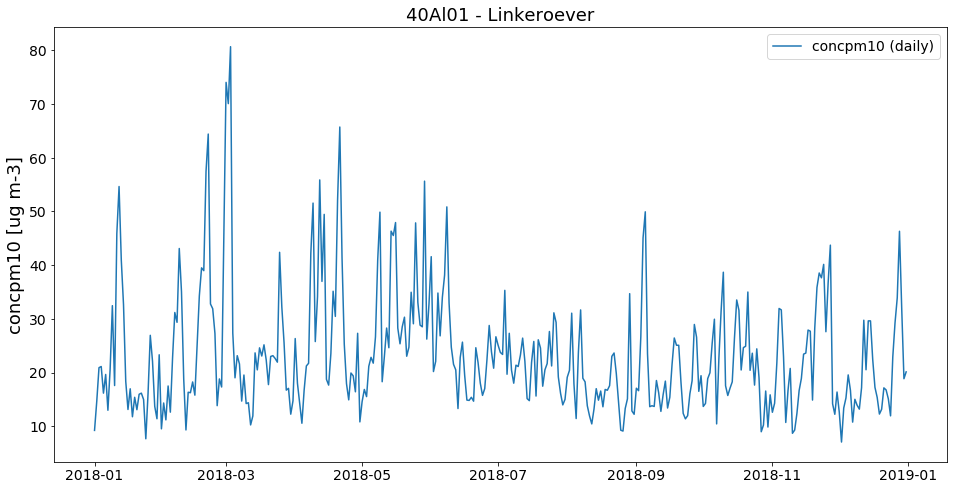

In [11]:
example_site.plot_timeseries('concpm10')

In [12]:
model_id =  'EMEP_rv4_33_Glob-CTRL'

model_reader = pya.io.ReadGridded(model_id)
model_reader


Pyaerocom ReadGridded
---------------------
Data ID: EMEP_rv4_33_Glob-CTRL
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/EMEP_rv4_33_Glob-CTRL/renamed
Available experiments: ['']
Available years: [2010]
Available frequencies ['daily' 'monthly']
Available variables: ['abs550aer', 'abs550bc', 'absc550aer', 'absc550dryaer', 'drybc', 'drydust', 'drynh4', 'dryno3', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'ec550aer', 'ec550dryaer', 'emisnox', 'emisox', 'loadbc', 'loaddust', 'loadnh4', 'loadno3', 'loadoa', 'loadso4', 'loadss', 'mmrbc', 'mmrdust', 'mmrnh4', 'mmrno3', 'mmroa', 'mmrso4', 'mmrss', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550lt1aer', 'od550nh4', 'od550no3', 'od550oa', 'od550so4', 'od550ss', 'od870aer', 'sconcaeroh2o', 'sconcbcc', 'sconcbcf', 'sconcdust', 'sconchno3', 'sconcnh3', 'sconcnh4', 'sconcno', 'sconcno2', 'sconcpm10', 'sconcpm25', 'sconcso2', 'sconcso4', 'sconcss', 'vmro3', 'vmro3max', 'wetbc', 'wetdust', 'wetnh4', 'w

In [13]:
emep_pm10_2010 = model_reader.read_var('concpm10', start=2010)
emep_pm10_2010

Deactivating file search by vertical code for EMEP_rv4_33_Glob-CTRL, since filenames do not include information about vertical code (probably AeroCom 2 convention)
Did not find concpm10 field but sconcpm10. Using the latter instead


pyaerocom.GriddedData
Grid data: <iris 'Cube' of SURF_ug_PM10_rh50 / (ug/m3) (time: 365; latitude: 360; longitude: 720)>

In [14]:
emep_pm10_2010.units

Unit('ug/m3')

In [15]:
coldata2018 = pya.colocation.colocate_gridded_ungridded(emep_pm10_2010, obs_pm10, update_baseyear_gridded=2018, start=2018, ts_type='monthly',
                                                        var_ref='concpm10')

Extracting timeseries data from large array (shape: (365, 360, 720)). This may take a while...
Time series extraction successful. Elapsed time: 21 s
/home/jonasg/miniconda3/envs/pya/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [21]:
# TODO: obsdata source is somewhere lost on the way, need fix
coldata2018.meta['data_source'][0] = 'GHOST.daily'

In [22]:
coldata2018.to_netcdf('.')

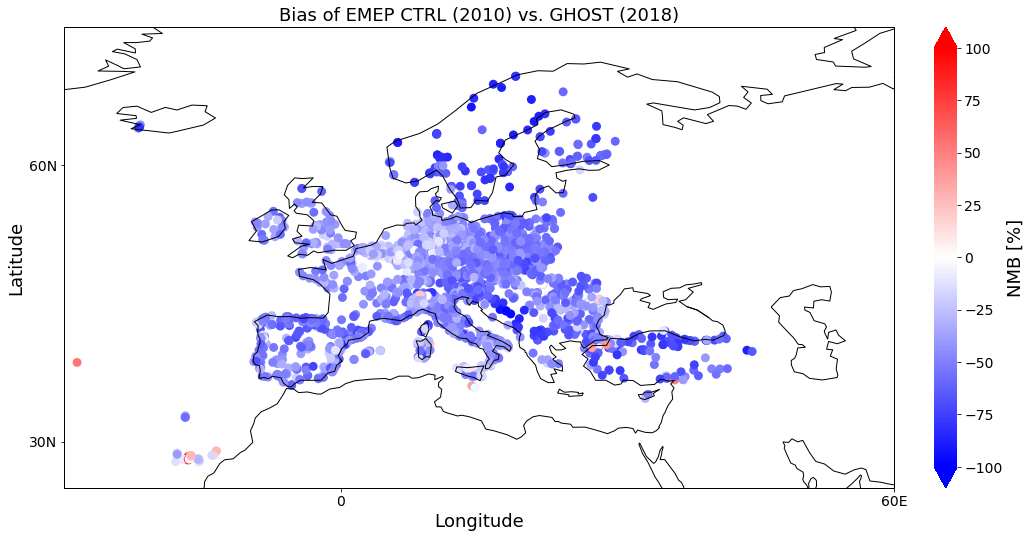

In [33]:
ax = pya.plot.mapping.plot_nmb_map_colocateddata(coldata2018, add_mean_edgecolor=False)
ax.set_xlim([-30, 60])
ax.set_ylim([25, 75])
ax.set_title('Bias of EMEP CTRL (2010) vs. GHOST (2018)');

(1, 200)

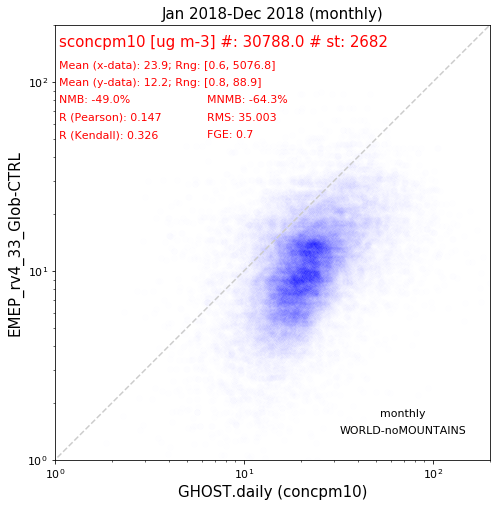

In [49]:
ax = coldata2018.plot_scatter(loglog=True, marker='o', alpha=0.002, color='blue')
ax.set_xlim([1, 200])
ax.set_ylim([1, 200])